# Principal Components for Dimensionality Reduction 

### First we review the underlying math 
### Then we look at the scikit learn implementation.  

In [1]:
import numpy as np
from numpy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt

#### Compute Covariance and Correlation - A small bit of **functional connectivity**

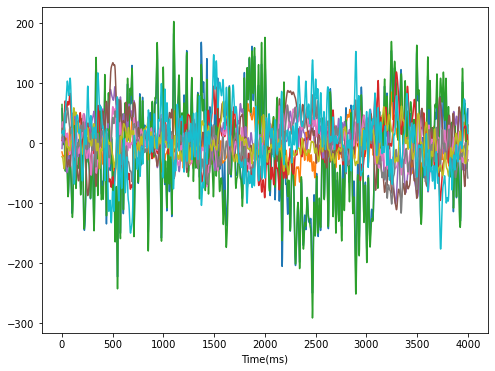

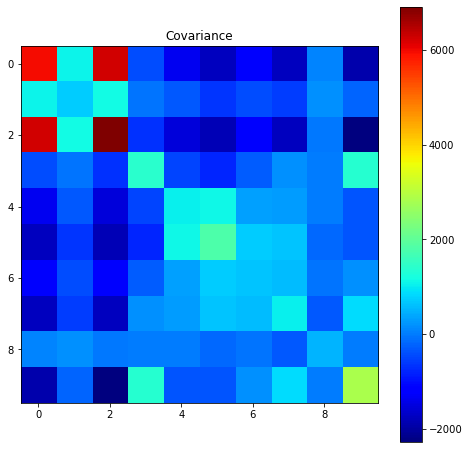

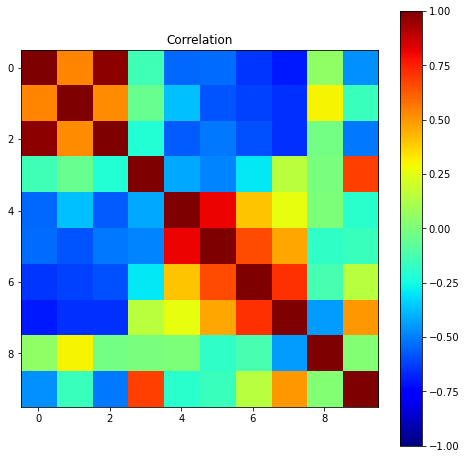

In [2]:
eeg = loadmat('data/eeg_full.mat') #load a big EEG data set
data = eeg['data'] 
channels10 = [8,21,23,35,49,65,78,87,98,115]
data10 = data[:,channels10] #select 10 channels, distributed over head, note here channels are columns not rows. 
plt.figure(figsize=(8,6))
plt.plot(data10)
plt.xlabel('Time(ms)')
plt.show()
data10 = np.transpose(data10)  #python likes variables in rows. 
C10 = np.cov(data10) #compute covariance
R10 = np.corrcoef(data10) #compute correlation coefficient
plt.figure(figsize = (8,8))
plt.imshow(C10,cmap='jet') 
plt.colorbar()
plt.title('Covariance')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(R10,vmin=-1,vmax=1,cmap='jet')
plt.colorbar()
plt.title('Correlation')
plt.show()

#### Calculate eigenvalues and eigenvectors and evaluate how much of the variance of the data is in each component. 

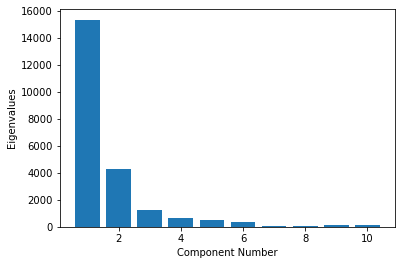

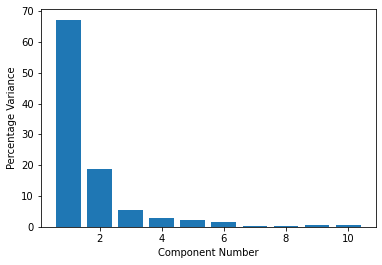

Text(0.5, 0, 'Component Number')

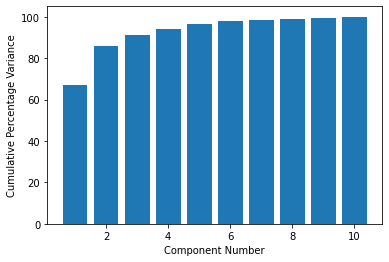

In [3]:
d,v = linalg.eig(C10)  #compute eigenvalues and eigenvectors 
plt.figure()
plt.bar(np.arange(1,11,1),d) #plot variance associated with each eigenvector
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.show()
percentvariance = 100*d/np.sum(d) #plot variance for each eigenvector as a % of total 
plt.figure()
plt.bar(np.arange(1,11,1),percentvariance)
plt.ylabel('Percentage Variance')
plt.xlabel('Component Number')
plt.show()
cumpercentvar = np.cumsum(percentvariance) #plot cumulative variance for each eigenvector.  
plt.figure()
plt.bar(np.arange(1,11,1),cumpercentvar)
plt.ylabel('Cumulative Percentage Variance')
plt.xlabel('Component Number')

#### Project the data to compute the principal component signals.  

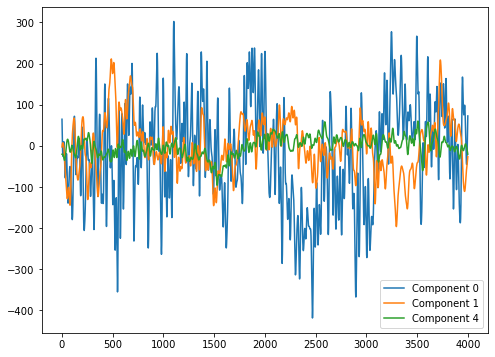

In [4]:
compEEG = np.transpose(v)@data10 #project the data onto the eigenvectors 
plt.figure(figsize = (8,6)) #plot a few component time series 
plt.plot(compEEG[0,:],label='Component 0') 

plt.plot(compEEG[1,:],label='Component 1') 
plt.plot(compEEG[4,:],label='Component 4') 
plt.legend()
plt.show()

#### Approximating an EEG signal with just a few principal components.   

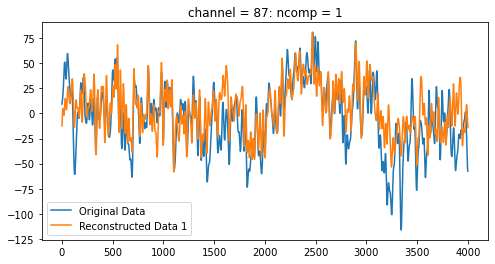

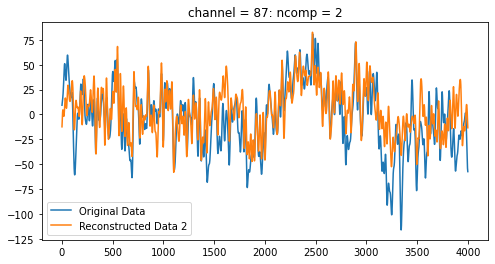

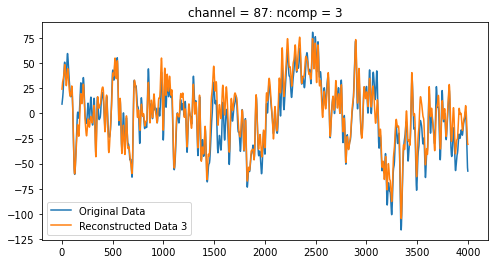

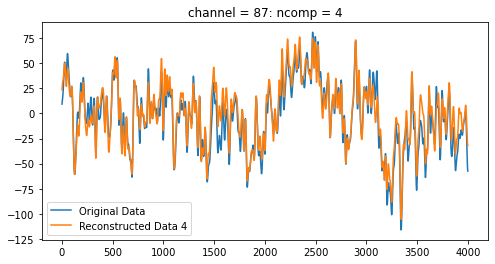

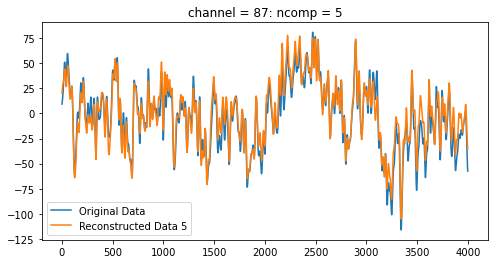

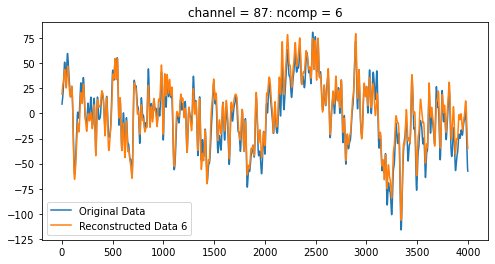

In [5]:
channel = 7 
for ncomponents in range(1,7,1):
    v_components  = v[:,np.arange(0,ncomponents,1)] #keep only the columns of v corresponding to components to keep
    compEEG_components = compEEG[np.arange(0,ncomponents,1),:] #keep only corresponding component time series
    data10recovered = v_components@compEEG_components #recover the data with subset of components
    plt.figure(figsize = (8,4))
    plt.plot(data10[channel,:],label='Original Data') #I arbitrarily chose 6th channel to plot. 
    plt.plot(data10recovered[channel,:],label='Reconstructed Data '+str(ncomponents)) #This is the approximation
    plt.legend()
    plt.title('channel = ' + str(channels10[channel]) + ': ncomp = ' + str(ncomponents))
    plt.show()


#### Principal Component Loading on the Original EEG signals 

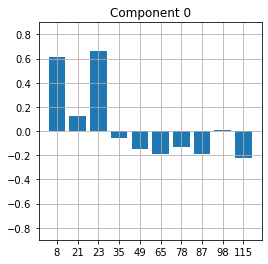

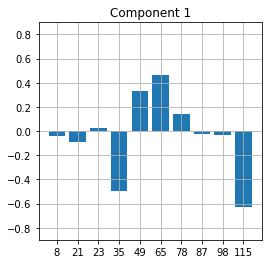

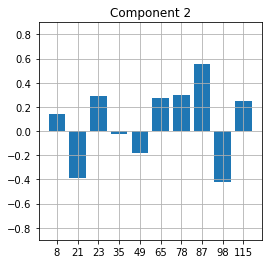

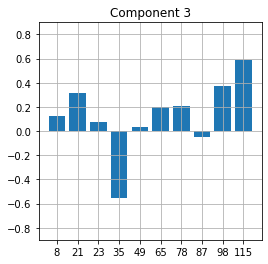

In [6]:
for j in range(4):
    plt.figure(figsize = (4,4))
    plt.bar(np.arange(1,11,1),np.transpose(v[:,j]),tick_label = channels10)
    plt.title('Component ' + str(j))
    plt.grid(True)
    plt.ylim((-0.9,0.9))
    plt.show()

In [ ]:
#REBUILD THE CHANNELS YOU WILL TAKE THE WEIGHTED SUMMARY 
#

## Sklearn PCA

#### Sklearn has a decomposition module, with a function called PCA.  
#### This interface is a little less intuitive as it uses objective coding principles. 
#### But, its convenient as it does the whole analysis

In [ ]:
#LEARN things about your data 
#mkaes matirx where the data is rows
# sky lean is chaing the sin of everything 

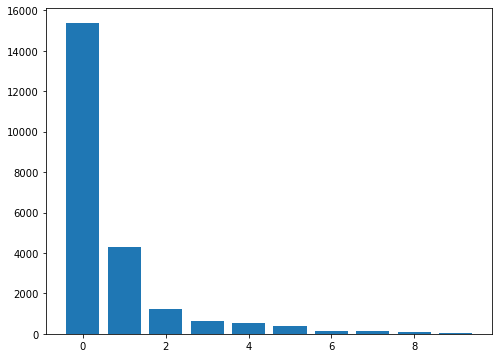

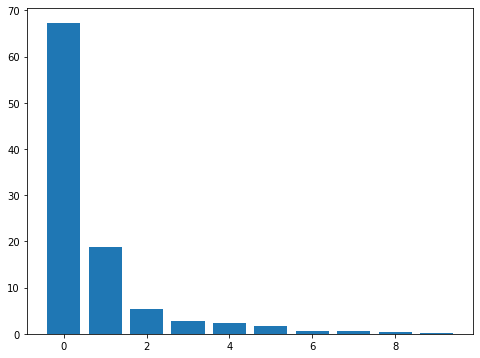

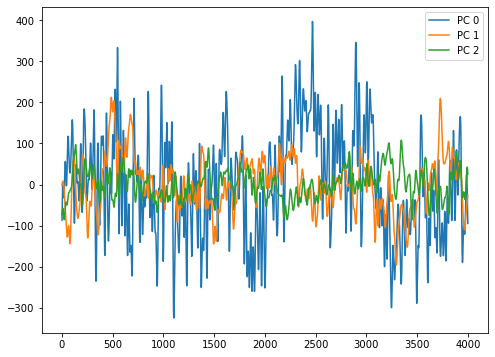

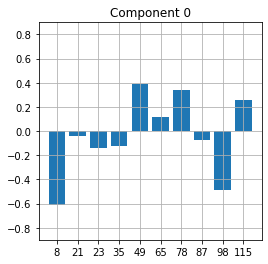

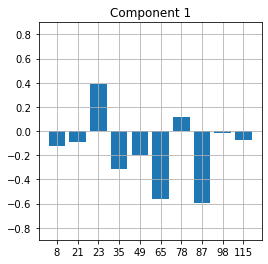

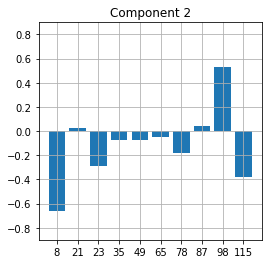

In [7]:
from sklearn.decomposition import PCA
data10_cols = np.transpose(data10)  # scikit learn is organized around the idea of variables as columns.  
pca = PCA(n_components = 10) #decide of number of components.  Always less than smaller dimension of data matrix 
#prinicple compnones analysis 
#receiver attribute that are meaningful 
pca.fit(data10_cols) #fit the model # combute the item values and vextors # fits the prinicple compnets 
loading = pca.components_ #get the eigenvectors items vectors 
explained = pca.explained_variance_ #get the explained variance # item values 
percentage_explained = 100*explained/sum(explained) # 
components = pca.transform(data10_cols) #project the data to get the components 
#%%
plt.figure(figsize = (8,6))
plt.bar(np.arange(0,10,1),explained)
plt.show()
plt.figure(figsize = (8,6))
plt.bar(np.arange(0,10,1),percentage_explained) # there are 10 eeg do 0 to 10 at increemtns at 1 
plt.show()
plt.figure(figsize = (8,6))
plt.plot(components[:,0],label='PC 0')
plt.plot(components[:,1],label='PC 1')
plt.plot(components[:,2],label='PC 2')
plt.legend()
plt.show()
for j in range(3):
    plt.figure(figsize = (4,4))
    plt.bar(np.arange(1,11,1),loading[:,j],tick_label = channels10)
    plt.title('Component ' + str(j))
    plt.grid(True)
    plt.ylim((-0.9,0.9))
    plt.show()
